# **LOAD DATA**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("diabetes (1).csv")
population = df.copy()
seed = 123
np.random.seed(seed)

## **RANDOM SAMPLE OF 25 , COMPARE MEAN & MAX OF GLUCOSE**

In [4]:
sample = population.sample(n=25, random_state=seed)

pop_mean_glucose = population["Glucose"].mean()
pop_max_glucose = population["Glucose"].max()

sample_mean_glucose = sample["Glucose"].mean()
sample_max_glucose = sample["Glucose"].max()

print("Population Mean Glucose:", pop_mean_glucose)
print("Sample Mean Glucose:", sample_mean_glucose)
print("Population Max Glucose:", pop_max_glucose)
print("Sample Max Glucose:", sample_max_glucose)

Population Mean Glucose: 120.89453125
Sample Mean Glucose: 130.36
Population Max Glucose: 199
Sample Max Glucose: 197


# **CHARTS**

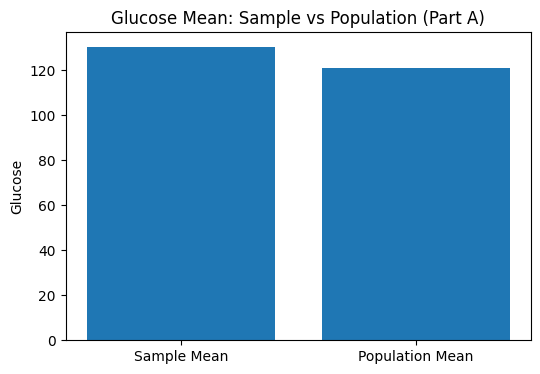

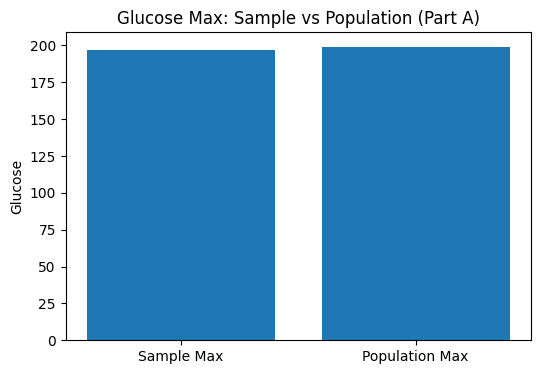

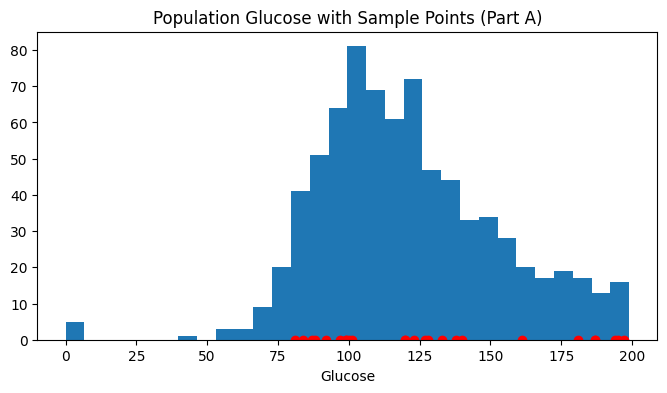

In [5]:
# Charts (A)
plt.figure(figsize=(6,4))
plt.bar(["Sample Mean","Population Mean"],
        [sample_mean_glucose, pop_mean_glucose])
plt.title("Glucose Mean: Sample vs Population (Part A)")
plt.ylabel("Glucose")
plt.show()

plt.figure(figsize=(6,4))
plt.bar(["Sample Max","Population Max"],
        [sample_max_glucose, pop_max_glucose])
plt.title("Glucose Max: Sample vs Population (Part A)")
plt.ylabel("Glucose")
plt.show()

plt.figure(figsize=(8,4))
plt.hist(population["Glucose"], bins=30)
plt.scatter(sample["Glucose"], [0]*25, color='red')
plt.title("Population Glucose with Sample Points (Part A)")
plt.xlabel("Glucose")
plt.show()

# **PRECENTILE OF BMI ,SAMPLE VS POPU98THLATION**

In [6]:
pop_98_bmi = np.percentile(population["BMI"], 98)
sample_98_bmi = np.percentile(sample["BMI"], 98)

print("Population 98th Percentile BMI:", pop_98_bmi)
print("Sample 98th Percentile BMI:", sample_98_bmi)


Population 98th Percentile BMI: 47.52599999999996
Sample 98th Percentile BMI: 45.263999999999996


# **CHARTS**

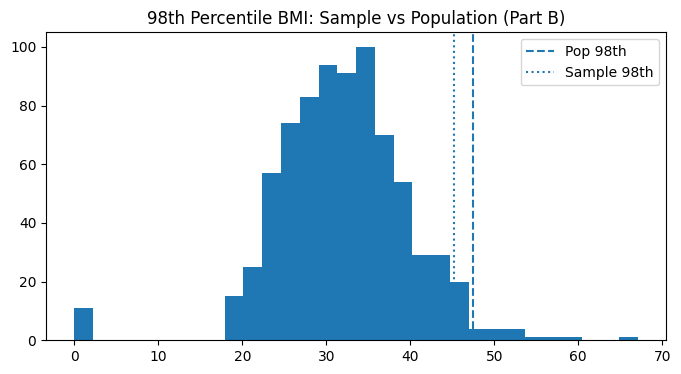

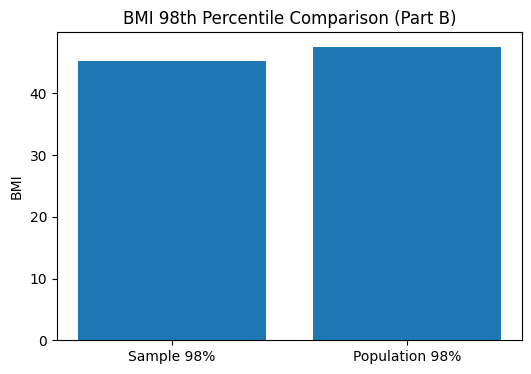

In [7]:
plt.figure(figsize=(8,4))
plt.hist(population["BMI"], bins=30)
plt.axvline(pop_98_bmi, linestyle='dashed', label="Pop 98th")
plt.axvline(sample_98_bmi, linestyle='dotted', label="Sample 98th")
plt.legend()
plt.title("98th Percentile BMI: Sample vs Population (Part B)")
plt.show()

plt.figure(figsize=(6,4))
plt.bar(["Sample 98%","Population 98%"], [sample_98_bmi, pop_98_bmi])
plt.title("BMI 98th Percentile Comparison (Part B)")
plt.ylabel("BMI")
plt.show()


# **BOOTSTRAP:500 SAMPLES OF SIZE 150 FOR BLOODPRESSURE**

In [10]:
bootstrap_means = []
bootstrap_stds = []
bootstrap_98 = []

for i in range(500):
    bs = population.sample(n=150, replace=True)
    bootstrap_means.append(bs["BloodPressure"].mean())
    bootstrap_stds.append(bs["BloodPressure"].std())
    bootstrap_98.append(np.percentile(bs["BloodPressure"], 98))


pop_mean_bp = population["BloodPressure"].mean()
pop_std_bp = population["BloodPressure"].std()
pop_98_bp = np.percentile(population["BloodPressure"], 98)

print("Population Mean BP:", pop_mean_bp)
print("Bootstrap Mean of Means:", np.mean(bootstrap_means))
print("\nPopulation SD BP:", pop_std_bp)
print("Bootstrap Mean of SDs:", np.mean(bootstrap_stds))
print("\nPopulation 98th Percentile BP:", pop_98_bp)
print("Bootstrap Mean of 98th Percentiles:", np.mean(bootstrap_98))


Population Mean BP: 69.10546875
Bootstrap Mean of Means: 69.01145333333334

Population SD BP: 19.355807170644777
Bootstrap Mean of SDs: 19.525254334216513

Population 98th Percentile BP: 99.31999999999994
Bootstrap Mean of 98th Percentiles: 98.19676000000003


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **CHARTS**

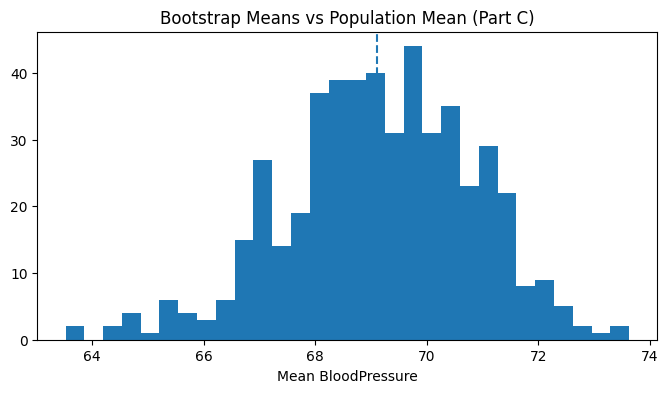

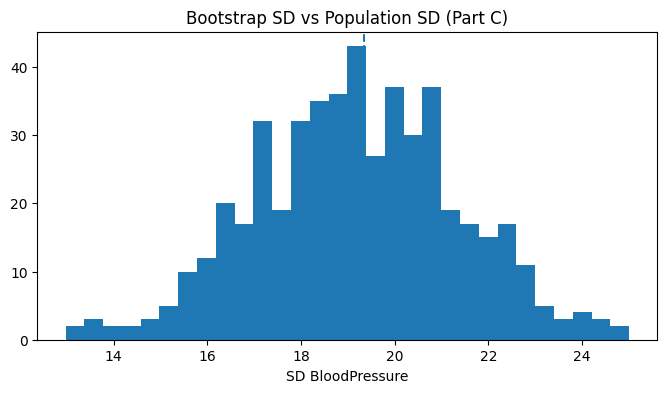

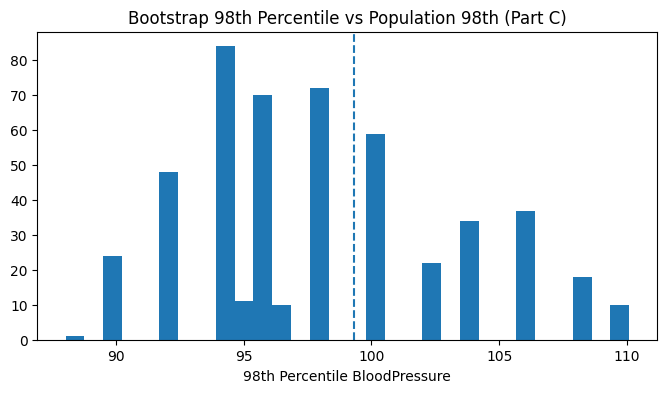

In [9]:
plt.figure(figsize=(8,4))
plt.hist(bootstrap_means, bins=30)
plt.axvline(pop_mean_bp, linestyle='dashed')
plt.title("Bootstrap Means vs Population Mean (Part C)")
plt.xlabel("Mean BloodPressure")
plt.show()

plt.figure(figsize=(8,4))
plt.hist(bootstrap_stds, bins=30)
plt.axvline(pop_std_bp, linestyle='dashed')
plt.title("Bootstrap SD vs Population SD (Part C)")
plt.xlabel("SD BloodPressure")
plt.show()

plt.figure(figsize=(8,4))
plt.hist(bootstrap_98, bins=30)
plt.axvline(pop_98_bp, linestyle='dashed')
plt.title("Bootstrap 98th Percentile vs Population 98th (Part C)")
plt.xlabel("98th Percentile BloodPressure")
plt.show()